In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.ticker as ticker

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



# Horror: Import and Clean Data

In [2]:
# File to Load (Remember to Change These)
horror_data_to_load = "data/Horror_dataframe.csv"


# Read CSV
horror = pd.read_csv(horror_data_to_load)

#drop NAN (full row only)
horror_clean=horror.dropna(how='all', inplace=False)


#convert year to single year (start year for series)
horror_clean["Start/Release_Year"] = horror_clean['Year'].str[:4]
horror_clean["Start/Release_Year"] = horror_clean["Start/Release_Year"].astype(float)

#filter for Country containing USA
horror_clean=horror_clean.loc[horror_clean.Country.str.contains("USA", na=False)]


#keep media with Start/Release Years of 2010-2019
years = ["2010", "2011", "2012", "2013",
         "2014", "2015", "2016", "2017", "2018"]
horror_years=horror_clean[horror_clean["Start/Release_Year"].isin(years)]


#convert # of votes to float for later calculation
horror_years["# of Votes"]=horror_years["# of Votes"].str.replace(',','')
horror_years["# of Votes"] = horror_years["# of Votes"].astype(float)



horror_years.head()


,IMDB ID,Title,Type of Media,Year,Country,Genre,Awards,Production Company,Rating,Metascore,IMDB Rating,# of Votes,Start/Release_Year
0,tt1320304,30 Days of Night: Dark Days,movie,2010,USA,"Horror, Thriller",2 wins.,SPE Acquisitions,R,NaN,4.4,11772.0,2010.0
1,tt0858411,2001 Maniacs: Field of Screams,movie,2010,USA,"Comedy, Horror",NaN,First Look Studios,R,NaN,3.2,2161.0,2010.0
2,tt1753422,Alice in Murderland,movie,2010,USA,"Horror, Thriller",NaN,Sterling Entertainment,Not Rated,NaN,1.8,865.0,2010.0
3,tt1100051,Bereavement,movie,2010,USA,"Crime, Horror, Thriller",4 wins.,Crimson Films,R,NaN,5.1,6320.0,2010.0
4,tt0947798,Black Swan,movie,2010,USA,"Drama, Thriller",Won 1 Oscar. Another 91 wins & 257 nominations.,Fox Searchlight,R,79.0,8.0,660992.0,2010.0


# Comedy: Import and Clean Data

In [3]:
# File to Load (Remember to Change These)
comedy_data_to_load = "data/Comedy_dataframe.csv"


# Read CSV
comedy = pd.read_csv(comedy_data_to_load)

#drop NAN (full row only)
comedy_clean=comedy.dropna(how='all', inplace=False)


#convert year to single year (start year for series)
comedy_clean["Start/Release_Year"] = comedy_clean['Year'].str[:4]
comedy_clean["Start/Release_Year"] = comedy_clean["Start/Release_Year"].astype(float)

#filter for Country containing USA
comedy_clean=comedy_clean.loc[comedy_clean.Country.str.contains("USA", na=False)]


#keep media with Start/Release Years of 2010-2019
years = ["2010", "2011", "2012", "2013",
         "2014", "2015", "2016", "2017", "2018"]
comedy_years=comedy_clean[comedy_clean["Start/Release_Year"].isin(years)]


#convert # of votes to float for later calculation
comedy_years["# of Votes"]=comedy_years["# of Votes"].str.replace(',','')
comedy_years["# of Votes"] = comedy_years["# of Votes"].astype(float)



comedy_years.head()


,IMDB ID,Title,Type of Media,Year,Country,Genre,Awards,Production Company,Rating,Metascore,IMDB Rating,# of Votes,Start/Release_Year
0,tt1038919,The Bounty Hunter,movie,2010,USA,"Action, Comedy, Romance",4 wins & 5 nominations.,Sony Pictures,PG-13,22.0,5.6,114202.0,2010.0
1,tt1385867,Cop Out,movie,2010,USA,"Action, Comedy, Crime, Thriller",1 nomination.,Warner Bros. Pictures,R,31.0,5.6,82489.0,2010.0
2,tt1336617,Cyrus,movie,2010,USA,"Comedy, Drama, Romance",6 nominations.,Fox Searchlight,R,74.0,6.3,32830.0,2010.0
3,tt1279935,Date Night,movie,2010,USA,"Comedy, Crime, Romance, Thriller",4 wins & 8 nominations.,20th Century Fox,PG-13,56.0,6.3,146296.0,2010.0
5,tt1323594,Despicable Me,movie,2010,"USA, France","Animation, Comedy, Family, Fantasy",Nominated for 1 Golden Globe. Another 3 wins &...,Universal Pictures,PG,72.0,7.6,474013.0,2010.0


# Documentary: Import and Clean Data

In [4]:
# File to Load (Remember to Change These)
docu_data_to_load = "data/Docu_dataframe.csv"


# Read CSV
docu = pd.read_csv(docu_data_to_load)


#drop NAN (full row only)
docu_clean=docu.dropna(how='all', inplace=False)


#convert year to single year (start year for series)
docu_clean["Start/Release_Year"] = docu_clean['Year'].str[:4]
docu_clean["Start/Release_Year"] = docu_clean["Start/Release_Year"].astype(float)

#filter for Country containing USA
docu_clean=docu_clean.loc[docu_clean.Country.str.contains("USA", na=False)]


#keep media with Start/Release Years of 2010-2019
years = ["2010", "2011", "2012", "2013",
         "2014", "2015", "2016", "2017", "2018"]
docu_years=docu_clean[docu_clean["Start/Release_Year"].isin(years)]


#convert # of votes to float for later calculation
docu_years["# of Votes"]=docu_years["# of Votes"].str.replace(',','')
docu_years["# of Votes"] = docu_years["# of Votes"].astype(float)



docu_years.head()


,IMDB ID,Title,Type of Media,Year,Country,Genre,Awards,Production Company,Rating,Metascore,IMDB Rating,# of Votes,Start/Release_Year
2,tt2247692,2016: Obama's America,movie,2012,USA,Documentary,1 nomination.,Rocky Mountain Pictures,PG,28.0,5.0,10197.0,2012.0
13,tt5895028,13th,movie,2016,USA,"Documentary, Crime, News",Nominated for 1 Oscar. Another 28 wins & 43 no...,Netflix,TV-MA,88.0,8.2,20569.0,2016.0
23,tt3219678,A Brony Tale,movie,2014,"Canada, USA, New Zealand",Documentary,4 nominations.,Abramorama Entertainment,Not Rated,NaN,5.5,621.0,2014.0
24,tt6295166,A Very Heavy Agenda,movie,2015,USA,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,2015.0
42,tt5118024,Almost Sunrise,movie,2016,USA,"Documentary, Adventure, Drama",1 win.,Argot Pictures,NaN,NaN,7.9,54.0,2016.0


# Science Fiction: Import and Clean Data

In [5]:
# File to Load (Remember to Change These)
scifi_data_to_load = "data/Scifi_dataframe.csv"
scifi_series_data_to_load = "data/Scifi_show_dataframe.csv"

# join files
scifi_data = pd.read_csv(scifi_data_to_load)
scifi_series_data = pd.read_csv(scifi_series_data_to_load)
scifi_data=scifi_data.append(scifi_series_data)

# remove duplicates based on Title
scifi_data = scifi_data.sort_values('Title', ascending=False)
scifi = scifi_data.drop_duplicates(subset='Title', keep='first')


#drop NAN (full row only)
scifi_clean=scifi.dropna(how='all', inplace=False)


#convert year to single year (start year for series)
scifi_clean["Start/Release_Year"] = scifi_clean['Year'].str[:4]
scifi_clean["Start/Release_Year"] = scifi_clean["Start/Release_Year"].astype(float)

#filter for Country containing USA
scifi_clean=scifi_clean.loc[scifi_clean.Country.str.contains("USA", na=False)]


#keep media with Start/Release Years of 2010-2019
years = ["2010", "2011", "2012", "2013",
         "2014", "2015", "2016", "2017", "2018"]
scifi_years=scifi_clean[scifi_clean["Start/Release_Year"].isin(years)]


#convert # of votes to float for later calculation
scifi_years["# of Votes"]=scifi_years["# of Votes"].str.replace(',','')
scifi_years["# of Votes"] = scifi_years["# of Votes"].astype(float)



scifi_years.head()


,IMDB ID,Title,Type of Media,Year,Country,Genre,Awards,Production Company,Rating,Metascore,IMDB Rating,# of Votes,Start/Release_Year
869,tt1747905,Zevo-3,series,2010–,USA,"Animation, Action, Adventure",NaN,NaN,NaN,NaN,5.2,44.0,2010.0
157,tt2693664,Young Ones,movie,2014,"South Africa, Ireland, USA","Action, Drama, Romance, Sci-Fi, Western",2 wins.,Screen Media Ventures,R,47.0,5.9,8840.0,2014.0
485,tt1641384,Young Justice,series,2010–,USA,"Animation, Action, Adventure, Crime, Drama, Ro...",Won 1 Primetime Emmy. Another 8 wins & 28 nomi...,NaN,TV-PG,NaN,8.7,28567.0,2010.0
853,tt1302067,Yogi Bear,movie,2010,"USA, New Zealand","Animation, Adventure, Comedy, Family",2 wins & 1 nomination.,Warner Bros. Pictures,PG,35.0,4.6,19341.0,2010.0
79,tt1270798,X-Men: First Class,movie,2011,"USA, UK","Action, Adventure, Sci-Fi",20 wins & 38 nominations.,20th Century Fox,PG-13,65.0,7.7,619607.0,2011.0


# Horror: Productions by Year

(0, 37)

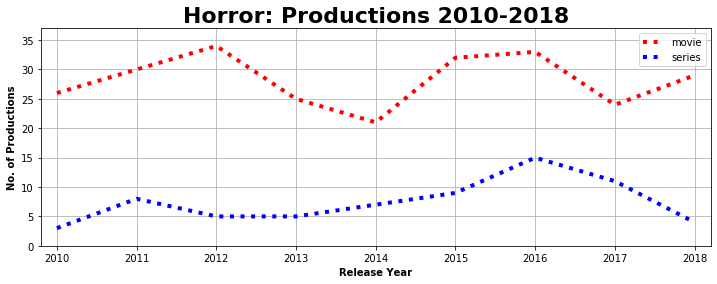

In [6]:
# Store number of productions grouped by media type and release year 
horror_gb = horror_years.groupby(["Type of Media", "Start/Release_Year"])
Number_Produced = horror_gb["Title"].count()

# Convert to DataFrame & reset index
horror_df_1 = pd.DataFrame({"No. of Productions": Number_Produced})
horror_df_1 = horror_df_1.reset_index()


# Re-Format the Data Frame
horror_df_1 = horror_df_1.pivot(index='Start/Release_Year', columns='Type of Media', values='No. of Productions')
horror_df_1.reset_index()

#plot number of productions
df=horror_df_1

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Horror: Productions 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("No. of Productions",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 37)



In [7]:
# Save plot
fig_1= ax.get_figure()
fig_1.savefig("figs/Horror_Productions.png")

# Comedy: Productions by Year

(0, 60)

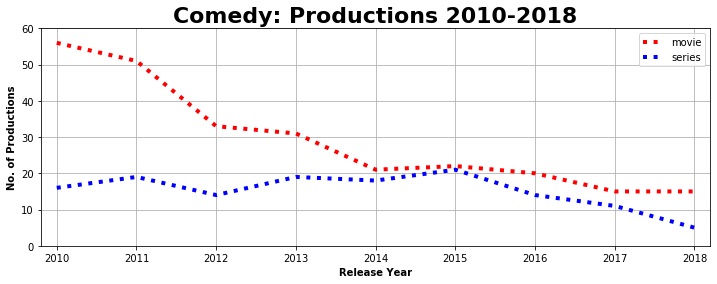

In [8]:
# Store number of productions grouped by media type and release year 
comedy_gb = comedy_years.groupby(["Type of Media", "Start/Release_Year"])
Number_Produced = comedy_gb["Title"].count()

# Convert to DataFrame & reset index
comedy_df_1 = pd.DataFrame({"No. of Productions": Number_Produced})
comedy_df_1 = comedy_df_1.reset_index()


# Re-Format the Data Frame
comedy_df_1 = comedy_df_1.pivot(index='Start/Release_Year', columns='Type of Media', values='No. of Productions')
comedy_df_1.reset_index()

#plot number of productions
df=comedy_df_1

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Comedy: Productions 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("No. of Productions",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 60)

In [9]:
# Save plot
fig_2= ax.get_figure()
fig_2.savefig("figs/Comedy_Productions.png")

# Documentary: Productions by Year

(0, 60)

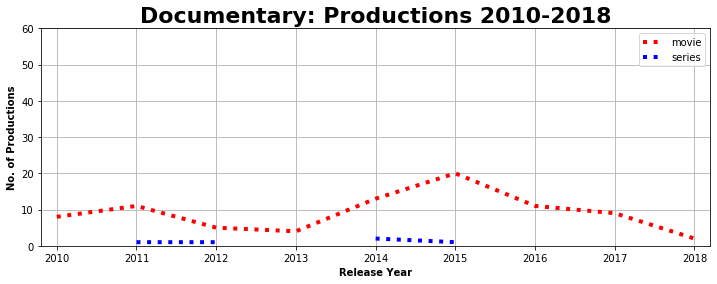

In [10]:
# Store number of productions grouped by media type and release year 
docu_gb = docu_years.groupby(["Type of Media", "Start/Release_Year"])
Number_Produced = docu_gb["Title"].count()

# Convert to DataFrame & reset index
docu_df_1 = pd.DataFrame({"No. of Productions": Number_Produced})
docu_df_1 = docu_df_1.reset_index()


# Re-Format the Data Frame
docu_df_1 = docu_df_1.pivot(index='Start/Release_Year', columns='Type of Media', values='No. of Productions')
docu_df_1.reset_index()

#plot number of productions
df=docu_df_1

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Documentary: Productions 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("No. of Productions",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 60)

In [11]:
# Save plot
fig_3= ax.get_figure()
fig_3.savefig("figs/Docu_Productions.png")

# Science Fiction: Productions by Year

(0, 60)

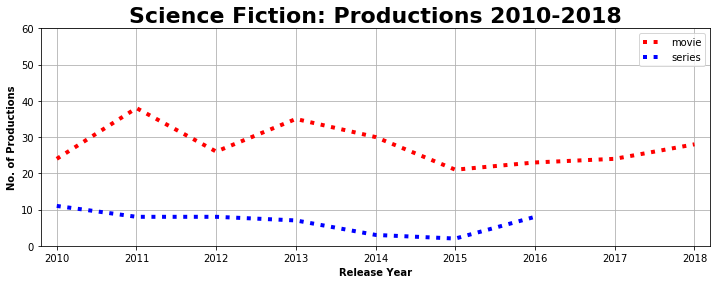

In [12]:
# Store number of productions grouped by media type and release year 
scifi_gb = scifi_years.groupby(["Type of Media", "Start/Release_Year"])
Number_Produced = scifi_gb["Title"].count()

# Convert to DataFrame & reset index
scifi_df_1 = pd.DataFrame({"No. of Productions": Number_Produced})

scifi_df_1 = scifi_df_1.reset_index()


# Re-Format the Data Frame
scifi_df_1 = scifi_df_1.pivot(index='Start/Release_Year', columns='Type of Media', values='No. of Productions')
scifi_df_1.reset_index()



#plot number of productions
df=scifi_df_1

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Science Fiction: Productions 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("No. of Productions",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 60)

In [13]:
# Save plot
fig_10= ax.get_figure()
fig_10.savefig("figs/SciFi_Productions.png")

# Horror: IMDB Ratings

(0, 10)

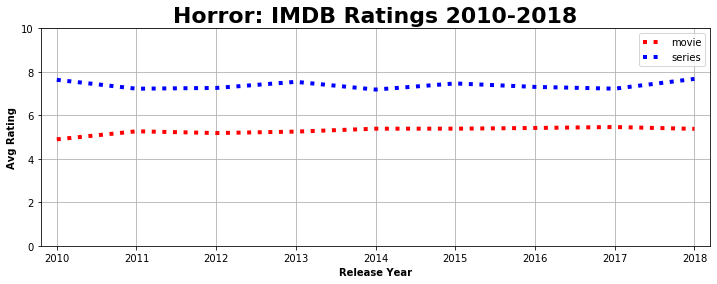

In [14]:
# Store number of productions grouped by media type and release year 
horror_gb = horror_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_rating = horror_gb["IMDB Rating"].mean()

# Convert to DataFrame & reset index
horror_df_2 = pd.DataFrame({"Avg IMDB Rating": avg_IMDB_rating})
horror_df_2 = horror_df_2.reset_index()


# Re-Format the Data Frame
horror_df_2 = horror_df_2.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Rating')
horror_df_2.reset_index()
    
 #plot number of productions
df=horror_df_2

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()

ax.set_title('Horror: IMDB Ratings 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("Avg Rating",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 10)
   

In [15]:
# Save plot
fig_4= ax.get_figure()
fig_4.savefig("figs/Horror_Ratings.png")

 # Comedy: IMDB Ratings

(0, 10)

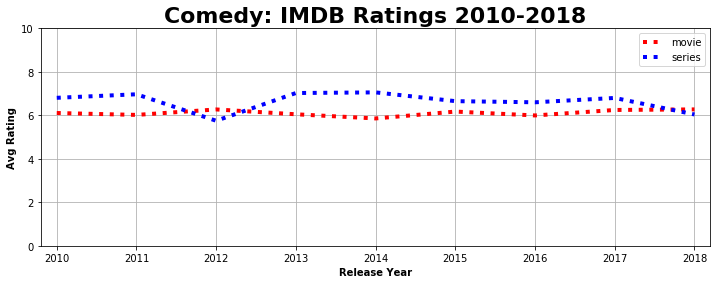

In [16]:
# Store number of productions grouped by media type and release year 
comedy_gb = comedy_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_rating = comedy_gb["IMDB Rating"].mean()

# Convert to DataFrame & reset index
comedy_df_2 = pd.DataFrame({"Avg IMDB Rating": avg_IMDB_rating})
comedy_df_2 = comedy_df_2.reset_index()


# Re-Format the Data Frame
comedy_df_2 = comedy_df_2.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Rating')
comedy_df_2.reset_index()
    
 #plot number of productions
df=comedy_df_2

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Comedy: IMDB Ratings 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("Avg Rating",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 10)
   

In [17]:
# Save plot
fig_5= ax.get_figure()
fig_5.savefig("figs/Comedy_Ratings.png")

# Documentary: IMDB Ratings

(0, 10)

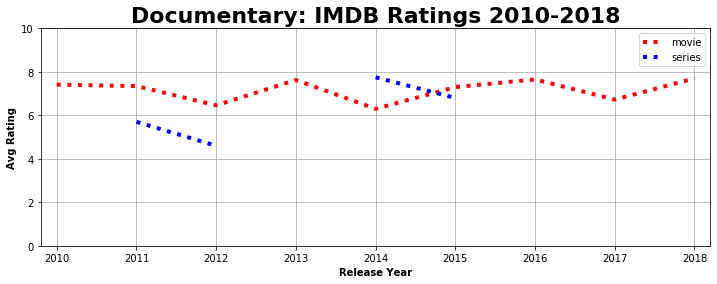

In [18]:
# Store number of productions grouped by media type and release year 
docu_gb = docu_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_rating = docu_gb["IMDB Rating"].mean()

# Convert to DataFrame & reset index
docu_df_2 = pd.DataFrame({"Avg IMDB Rating": avg_IMDB_rating})
docu_df_2 = docu_df_2.reset_index()


# Re-Format the Data Frame
docu_df_2 = docu_df_2.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Rating')
docu_df_2.reset_index()
    
 #plot number of productions
df=docu_df_2

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Documentary: IMDB Ratings 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("Avg Rating",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 10)

In [19]:
# Save plot
fig_6= ax.get_figure()
fig_6.savefig("figs/Docu_Ratings.png")

# Science Fiction: IMDB Ratings

(0, 10)

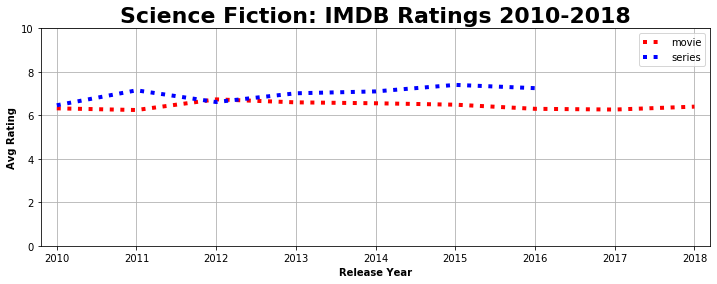

In [20]:
# Store number of productions grouped by media type and release year 
scifi_gb = scifi_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_rating = scifi_gb["IMDB Rating"].mean()

# Convert to DataFrame & reset index
scifi_df_2 = pd.DataFrame({"Avg IMDB Rating": avg_IMDB_rating})
scifi_df_2 = scifi_df_2.reset_index()


# Re-Format the Data Frame
scifi_df_2 = scifi_df_2.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Rating')
scifi_df_2.reset_index()
    
 #plot number of productions
df=scifi_df_2

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Science Fiction: IMDB Ratings 2010-2018',fontsize= 22,weight="bold")
ax.set_xlabel("Release Year",weight="bold")
ax.set_ylabel("Avg Rating",weight="bold")

plt.xlim(2009.8, 2018.2)
plt.ylim(0, 10)

In [21]:
# Save plot
fig_11= ax.get_figure()
fig_11.savefig("figs/SciFi_Ratings.png")

# Horror: IMDB Vote Count

(2009.8, 2018.2)

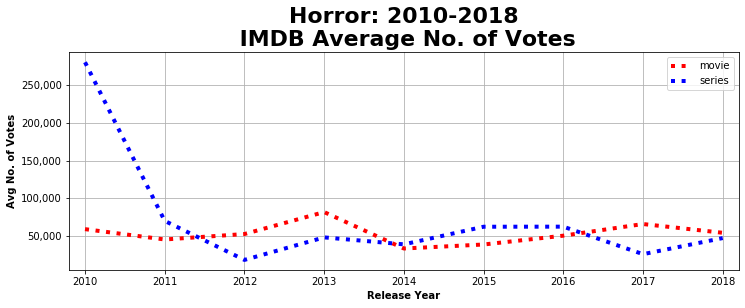

In [22]:
# Store number of productions grouped by media type and release year 
horror_gb = horror_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_votes = horror_gb["# of Votes"].mean()

# Convert to DataFrame & reset index
horror_df_3 = pd.DataFrame({"Avg IMDB Votes": avg_IMDB_votes})
horror_df_3 = horror_df_3.reset_index()


# Re-Format the Data Frame
horror_df_3 = horror_df_3.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Votes')
horror_df_3.reset_index()
    
 #plot number of productions
df=horror_df_3

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Horror: 2010-2018\n IMDB Average No. of Votes" ,fontsize= 22,weight="bold" )
ax.set_xlabel("Release Year", weight="bold")
ax.set_ylabel("Avg No. of Votes",weight="bold")

plt.xlim(2009.8, 2018.2)

   

In [23]:
# Save plot
fig_7= ax.get_figure()
fig_7.savefig("figs/Horror_Votes.png")

# Comedy: IMDB Vote Count

(0, 165000)

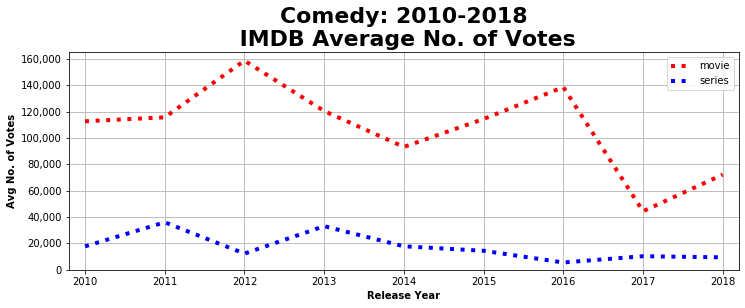

In [24]:
# Store number of productions grouped by media type and release year 
comedy_gb = comedy_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_votes = comedy_gb["# of Votes"].mean()

# Convert to DataFrame & reset index
comedy_df_3 = pd.DataFrame({"Avg IMDB Votes": avg_IMDB_votes})
comedy_df_3 = comedy_df_3.reset_index()


# Re-Format the Data Frame
comedy_df_3 = comedy_df_3.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Votes')
comedy_df_3.reset_index()
    
 #plot number of productions
df=comedy_df_3

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Comedy: 2010-2018\n IMDB Average No. of Votes" ,fontsize= 22,weight="bold" )
ax.set_xlabel("Release Year", weight="bold")
ax.set_ylabel("Avg No. of Votes",weight="bold")


plt.xlim(2009.8, 2018.2)
plt.ylim(0, 165000)
   

In [25]:
# Save plot
fig_8= ax.get_figure()
fig_8.savefig("figs/Comedy_Votes.png")

# Documentary: IMDB Vote Count

(0, 165000)

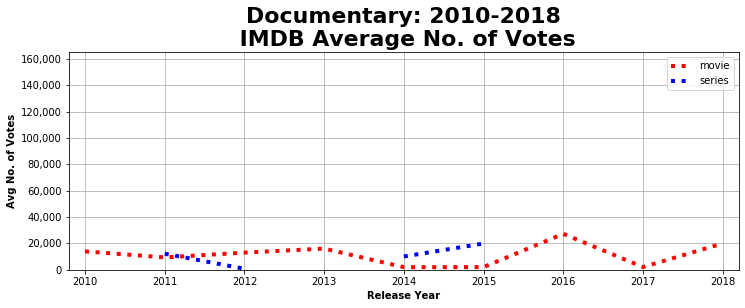

In [26]:
# Store number of productions grouped by media type and release year 
docu_gb = docu_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_votes = docu_gb["# of Votes"].mean()

# Convert to DataFrame & reset index
docu_df_3 = pd.DataFrame({"Avg IMDB Votes": avg_IMDB_votes})
docu_df_3 = docu_df_3.reset_index()


# Re-Format the Data Frame
docu_df_3 = docu_df_3.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Votes')
docu_df_3.reset_index()
    
 #plot number of productions
df=docu_df_3

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Documentary: 2010-2018\n IMDB Average No. of Votes" ,fontsize= 22,weight="bold" )
ax.set_xlabel("Release Year", weight="bold")
ax.set_ylabel("Avg No. of Votes",weight="bold")


plt.xlim(2009.8, 2018.2)
plt.ylim(0, 165000)
   

In [27]:
fig_9= ax.get_figure()
fig_9.savefig("figs/Docu_Votes.png")

# Science Fiction: IMDB Vote Count

(2009.8, 2018.2)

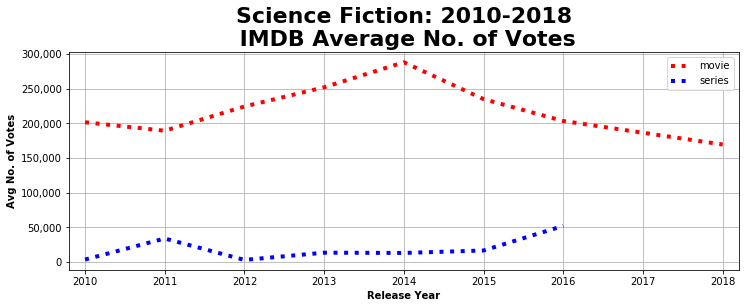

In [28]:
# Store number of productions grouped by media type and release year 
scifi_gb = scifi_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_votes = scifi_gb["# of Votes"].mean()

# Convert to DataFrame & reset index
scifi_df_3 = pd.DataFrame({"Avg IMDB Votes": avg_IMDB_votes})
scifi_df_3 = scifi_df_3.reset_index()


# Re-Format the Data Frame
scifi_df_3 = scifi_df_3.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Votes')
scifi_df_3.reset_index()
    
 #plot number of productions
df=scifi_df_3

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",linewidth=4,figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted",linewidth=4, ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Science Fiction: 2010-2018\n IMDB Average No. of Votes" ,fontsize= 22,weight="bold" )
ax.set_xlabel("Release Year", weight="bold")
ax.set_ylabel("Avg No. of Votes",weight="bold")


plt.xlim(2009.8, 2018.2)

   

In [29]:
fig_12= ax.get_figure()
fig_12.savefig("figs/SciFi_Votes.png")